Maciej Małecki
# Machine Learning  - Manual Neural Network


# Introduction


The purpose of our report is to present our implementation of neural network which checks if given point is in second quarter of coordinate system and to analyse the impact of different hyperparameters on obtained solutions.

## Implementation of neural network with two layers

Our class takes 2 inputs, gives one output and the number of neurons in hidden layer can be specified by user. At the beginning it creates a training set of points from uniform distribution (-10, 10) (number of points specified by user) and a set of correct labels which are used in order to fit the weights of the network. The initial weights can be from uniform distribution, normal distribution or all equal to zero. Process of learning consists of feedforward and backpropagation functions. The weights are being adjusted with each point. The bias is also being added in each iteration (here it is called fake_value and is equal to -1). For the activation function we have chosen a sigmoid function. At the end, the function named solution returns the probability if the given point is in the second quarter. 

In [0]:
!pip install bokeh

import numpy as np
import matplotlib.pyplot as plt
import math
import random
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.layouts import gridplot

In [0]:
class Neural_Network_on_quarter_2layers:
    def __init__(self, number_of_points, shape_of_layer1, eta, weight="Uniform"):
        self.number_of_points = number_of_points
        self.x = np.array([random.uniform(-10, 10) for i in range(number_of_points)])
        self.y = np.array([random.uniform(-10, 10) for i in range(number_of_points)])
        self.list_of_points = self.__choose_label()
        self.weight = weight
        self.weight1 = self._random_weight(self.weight, shape_of_layer1, 3)
        self.weight2 = self._random_weight(self.weight, 1, shape_of_layer1+1)
        ##
        self.input = []
        self.output = []
        self.fake_value = np.array([-1])
        self.fake_input_X1 = []
        self.layer1 = []
        self.fake_input_X2 = []
        self.layer2 = []
        ##
        self.learning_rate = eta
        self.error_signal2 = []
        self.delta_signal2 = []
        self.d_weight2 = []
        ##
        self.error_signal1 = []
        self.delta_signal1 = []
        self.d_weight1 = []

    def __choose_label(self):
        list_of_points = []
        for i in range(self.number_of_points):
            if self.x[i] < 0 and self.y[i] > 0:
                list_of_points.append([self.x[i], self.y[i], 1])
            else:
                list_of_points.append([self.x[i], self.y[i], 0])
        return list_of_points

    def _random_weight(self, weight, shape1, shape2):
        if weight == "Normal":
            return np.random.normal(0, 1, [shape1, shape2])
        elif weight == "Uniform":
            return np.random.uniform(0, 1, [shape1, shape2])
        elif weight == "Zeros":
            return np.zeros([shape1, shape2])
        else:
            return "Error: write another random function for weight"

    def create_fake_input_X1(self):
        return np.vstack((self.input, self.fake_value)).astype(float)

    def create_fake_input_X2(self):
        return np.vstack((self.layer1, self.fake_value)).astype(float)

    def sigma(self, x):
        return 1.0 / (1 + np.exp(-x))

    def sigma_derivative(self, x):
        return x * (1.0 - x)

    def feedforward(self):
        self.fake_input_X1 = self.create_fake_input_X1()
        self.layer1 = self.sigma(np.dot(self.weight1, self.fake_input_X1))
        self.fake_input_X2 = self.create_fake_input_X2()
        self.layer2 = self.sigma(np.dot(self.weight2, self.fake_input_X2))

    def backprop(self):
        # error for second layer
        self.error_signal2 = np.subtract(self.output, self.layer2)
        self.delta_signal2 = np.multiply(self.error_signal2, self.sigma_derivative(self.layer2))
        self.d_weight2 = np.add(self.weight2, np.multiply(self.learning_rate, np.dot(self.delta_signal2, self.fake_input_X2.T)))
        # error for first layer
        self.error_signal1 = np.dot(self.weight2.T, self.delta_signal2)
        self.error_signal1 = self.error_signal1[:-1]
        self.delta_signal1 = np.multiply(self.error_signal1, self.sigma_derivative(self.layer1))
        self.d_weight1 = np.add(self.weight1, np.multiply(self.learning_rate, np.dot(self.delta_signal1, self.fake_input_X1.T)))
        # change variables
        self.weight1 = self.d_weight1
        self.weight2 = self.d_weight2

    def train_network(self):
        for x, y, label in self.list_of_points:
            self.input = np.array([[x], [y]])
            self.output = np.array([label])
            for i in range(1):
                self.feedforward()
                self.backprop()
    
    def origin_label(self,x,y):
        origin_labels = []
        for i in range(len(x)):
            if self.x[i] < 0 and self.y[i] > 0:
                origin_labels.append(1)
            else:
                origin_labels.append(0)
        return origin_labels
    
    def cost_function(self, minibaches = 50, number_of_points_test = 1000, v = 10):
        cost = []
        for i in np.arange(np.divide(len(self.list_of_points), minibaches)):
            array_weight1 = []
            array_weight2 = []
            range_list_of_points = self.list_of_points[int(i*minibaches) : int((i+1)*minibaches)]
            aux_weight1 = self.weight1.copy()
            aux_weight2 = self.weight2.copy()
            for x, y, label in range_list_of_points:
                self.input = np.array([[x], [y]])
                self.output = np.array([label])
                self.feedforward()
                self.backprop()
                array_weight1.append(self.weight1)
                array_weight2.append(self.weight2)
                self.weight1 = aux_weight1
                self.weight2 = aux_weight2
            self.weight1 = np.mean(array_weight1)
            self.weight2 = np.mean(array_weight2)
            x = [random.uniform(-v, v) for i in range(number_of_points_test)]
            y = [random.uniform(-v, v) for i in range(number_of_points_test)]
            
            label_predict = []
            for j in range(number_of_points_test):
                label_predict.append(nnq.solution([[x[j],y[j]]])[0][0])
                
            origin_labels = self.origin_label(x,y)
            
            term1 = np.multiply(np.multiply(-1, origin_labels), np.log(label_predict))
            term2 = np.multiply(np.multiply(-1, origin_labels)+1, np.log(np.multiply(-1, label_predict)+1))
            part_cost = np.sum(term1-term2)
            cost.append(part_cost)
        return cost   
                
                

    def solution(self, test_input):
        for x, y in test_input:
            self.input = np.array([[x], [y]])
        self.fake_input_X1 = self.create_fake_input_X1()
        self.layer1 = self.sigma(np.dot(self.weight1, self.fake_input_X1))
        self.fake_input_X2 = self.create_fake_input_X2()
        self.layer2 = self.sigma(np.dot(self.weight2, self.fake_input_X2))
        return self.layer2


## Analysis for the neural network with 2 layers

### Classification of points made by our neural network


The figure below presents classification of points made by our network with two neurons in hidden layer, fitted with 12000 train points, eta equal to 0.1 and initial weights randomly chosen. Function solution returns probabilities so we are rounding outputs and we obtain 0-1 values in order to compare true and computed labels. Even this simple figure shows that accuracy is acceptable. 


In [0]:
#@title <code>
learning_points = 12000
number_of_neurons = 2
eta = 0.1
distribution = "Uniform"
nnq = Neural_Network_on_quarter_2layers(learning_points, number_of_neurons, eta, distribution)
nnq.train_network()

number_of_points = 4000
v = 10     #range
x = [random.uniform(-v, v) for i in range(number_of_points)]
y = [random.uniform(-v, v) for i in range(number_of_points)]
label = []
for i in range(number_of_points):
    label.append(round(nnq.solution([[x[i],y[i]]])[0][0])) # nie wiem, czy lepiej w prawdopodobieństwach czy 0-1?


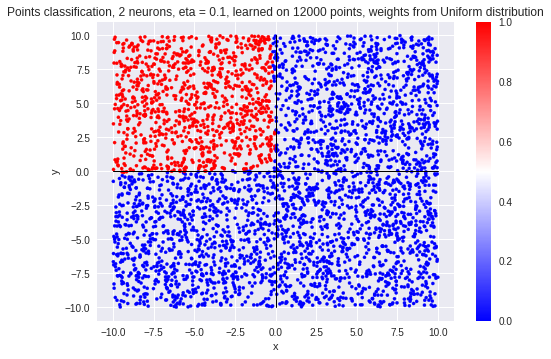

In [0]:
#@title <code>
plt.scatter(x,y,c=label, s=10, cmap='bwr')
plt.title("Points classification, "+str(number_of_neurons)+" neurons, eta = "+str(eta)+", learned on "+str(learning_points)+" points, weights from "+ distribution+" distribution")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.plot([0, 0], [-v, v], 'k-', lw=1)
plt.plot([-v, v], [0, 0], 'k-', lw=1)
plt.show()


### Effectivness test

#### Number of neurons in hidden layer

In [0]:
#@title <code>
def effectiveness2(monte_carlo, number_of_points, number_of_neurons, eta, distr_weights, net):
    mean_correct_guesses = []
    for mc in range(monte_carlo):
        correct_guesses = 0
        if net == 2:
            nnq = Neural_Network_on_quarter_2layers(number_of_points, number_of_neurons, eta, distr_weights)
            nnq.train_network()
        elif net == 3:
            nnq = Neural_Network_on_quarter_3layers(number_of_points, number_of_neurons, eta, distr_weights)
            nnq.train_network()
        v=10
        for sample in range(1000):
            x = random.uniform(-v, v)
            y = random.uniform(-v, v)
            if x<0 and y>0:
                label = 1
            else:
                label = 0
            if np.around(nnq.solution([[x,y]])) == label:
                correct_guesses +=1
        mean_correct_guesses.append(correct_guesses)
    return np.mean(mean_correct_guesses)/1000

def show_effectiveness2_point(monte_carlo, max_number_of_points, eta, jump, distr_weights, net):
    x = [i for i in np.arange(10,max_number_of_points,jump)]
    if net == 2:
        y1 = [100*effectiveness2(monte_carlo, i, 1, eta,distr_weights,net) for i in x]
        y2 = [100*effectiveness2(monte_carlo, i, 2, eta,distr_weights,net) for i in x]
        y4 = [100*effectiveness2(monte_carlo, i, 4, eta,distr_weights,net) for i in x]
        y10 = [100*effectiveness2(monte_carlo, i, 10, eta,distr_weights,net) for i in x]
        p = figure(plot_width=600, plot_height=400, title = "Effectiveness depending on number of training points (weights {})".format(str(distr_weights)))
    #     p.grid.grid_line_alpha=0.3
        p.line(x,y1,color='#000000', legend='1 neuron')
        p.line(x,y2,color='#0000FF', legend='2 neurons')
        p.line(x,y4,color='#00FF00', legend='4 neurons')
        p.line(x,y10,color='#FF0000', legend='10 neurons')
        p.legend.location = "bottom_right"
        p.xaxis.axis_label = 'Number of training points'
        p.yaxis.axis_label = 'Effectiveness in %'
    elif net == 3:
        y1 = [100*effectiveness2(monte_carlo, i, [2,1], eta,distr_weights,net) for i in x]
        y2 = [100*effectiveness2(monte_carlo, i, [2,2], eta,distr_weights,net) for i in x]
        y4 = [100*effectiveness2(monte_carlo, i, [4,2], eta,distr_weights,net) for i in x]
        y10 = [100*effectiveness2(monte_carlo, i, [10,2], eta,distr_weights,net) for i in x]
#     output_notebook()
        p = figure(plot_width=600, plot_height=400, title = "Effectiveness depending on number of training points (weights {})".format(str(distr_weights)))
    #     p.grid.grid_line_alpha=0.3
        p.line(x,y1,color='#000000', legend='l1=2, l2=1 neurons')
        p.line(x,y2,color='#0000FF', legend='l1=2, l2=2 neurons')
        p.line(x,y4,color='#00FF00', legend='l1=4, l2=2 neurons')
        p.line(x,y10,color='#FF0000', legend='l1=10, l2=2 neurons')
        p.legend.location = "bottom_right"
        p.xaxis.axis_label = 'Number of training points'
        p.yaxis.axis_label = 'Effectiveness in %'
#     show(p)
    return p

In [0]:
#@title <code>
output_notebook()

monte_carlo1 = 50
number_of_points1 = 3810
jump1 = 200
p1 = show_effectiveness2_point(monte_carlo1, number_of_points1, 0.1, jump1, "Uniform",2)

monte_carlo2 = 50
number_of_points2 = 3810
jump2 = 200
p2 = show_effectiveness2_point(monte_carlo2, number_of_points2, 0.1, jump2, "Normal",2)

monte_carlo3 = 50
number_of_points3 = 3810
jump3 = 200
p3 = show_effectiveness2_point(monte_carlo3, number_of_points3, 0.1, jump3, "Zeros",2)


show(gridplot([p1,p2,p3], ncols=2))

Loading BokehJS ...

Our first test checks what is the effectiveness of network depending on number of training points. Different lines are for different number of neurons in hidden layer. Each of three figures above is devoted to one of three possible initial weights distributions. As we can see after 500 points we have obtained almost the same results for weights from uniform and normal distribution. Apart from case with one neuron which converges to about 88-90%, all other lines converge to about 99%. The case with all weights equal to zero starts to stabilise later than in first two figures and here all cases converge to about 91%.

What was suprising for us, we have obtained the best results for the largest number of neurons in hidden layer. We thought that, according to the literature, for our input of 2 numbers and output of 1 number, one or two neurons will be the best possible choice, but it turn out that it is better to take larger number of neurons even for this simple example of checking quarter.

#### Effectiveness for different etas

In [0]:
#@title <code>
def show_effectiveness2_eta(monte_carlo, max_number_of_points, eta, distr_weights, net):
    x = eta
    y1 = [100*effectiveness2(monte_carlo, max_number_of_points, 1, i,distr_weights,net) for i in x]
    y2 = [100*effectiveness2(monte_carlo, max_number_of_points, 2, i,distr_weights,net) for i in x]
    y4 = [100*effectiveness2(monte_carlo, max_number_of_points, 4, i,distr_weights,net) for i in x]
    y10 = [100*effectiveness2(monte_carlo, max_number_of_points, 10, i,distr_weights,net) for i in x]
#     output_notebook()
    p = figure(plot_width=600, plot_height=400, title = "Effectiveness depending on eta (weights {})".format(str(distr_weights)))
#     p.grid.grid_line_alpha=0.3
    p.line(x,y1,color='#000000', legend='1 neuron')
    p.line(x,y2,color='#0000FF', legend='2 neurons')
    p.line(x,y4,color='#00FF00', legend='4 neurons')
    p.line(x,y10,color='#FF0000', legend='10 neurons')
    p.legend.location = "bottom_right"
    p.xaxis.axis_label = 'eta'
    p.yaxis.axis_label = 'Effectiveness in %'
#     show(p)
    return p

In [0]:
#@title <code>
output_notebook()

monte_carlo1 = 50
number_of_points = 4000
eta = [0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]
p1 = show_effectiveness2_eta(monte_carlo1, number_of_points, eta, "Uniform",2)

p2 = show_effectiveness2_eta(monte_carlo2, number_of_points, eta, "Normal",2)

p3 = show_effectiveness2_eta(monte_carlo3, number_of_points, eta, "Zeros",2)


show(gridplot([p1,p2,p3], ncols=2))

Loading BokehJS ...

Here we wanted to check which value of eta parameter could be the best for our application. As we can see on the first and on the second plot the effectiveness starting from eta = 0.1 is almost at the same level, so all etas smaller than 0.1 seems to be not so good choice for us. 
Differently for the all-zeros-case we can see that smaller value (exactly 0.05) seems to be the best fit for chosen number of training points. 

# The network with three layers




Here there is our second attempt of implementing the neural network, but this time with 2 hidden layers which shapes can be specified by user. All the rest stays the same. 

In [0]:
class Neural_Network_on_quarter_3layers:
    def __init__(self,number_of_points, shape_of_layer, eta, weight="Zeros"):
        self.number_of_points = number_of_points
        self.x = np.array([random.uniform(-10, 10) for i in range(number_of_points)])
        self.y = np.array([random.uniform(-10, 10) for i in range(number_of_points)])
        self.weight = weight
        self.list_of_points = self.__choose_label()
        self.weight1 = self._random_weight(self.weight,shape_of_layer[0],3)
        self.weight2 = self._random_weight(self.weight,shape_of_layer[1],shape_of_layer[0]+1)
        self.weight3 = self._random_weight(self.weight,1,shape_of_layer[1]+1)
        ##
        self.input = []
        self.output = []
        self.fake_value = np.array([-1])
        self.fake_input_X1 = []
        self.layer1 = []
        self.fake_input_X2 = []
        self.layer2 = []
        self.fake_input_X3 = []
        self.layer3 = []
        ## 
        self.learning_rate = eta
        ##
        self.error_signal3 = []
        self.delta_signal3 = []
        self.d_weight3 = []
        ##
        self.error_signal2 = []
        self.delta_signal2 = []
        self.d_weight2 = []
        ##
        self.error_signal1 = []
        self.delta_signal1 = []
        self.d_weight1 = []

    def __choose_label(self):
        list_of_points = []
        for i in range(self.number_of_points):
            if self.x[i]<0 and self.y[i]>0:
                list_of_points.append([self.x[i], self.y[i], 1])
            else:
                list_of_points.append([self.x[i], self.y[i], 0])

        return list_of_points
    
    def _random_weight(self, weight, shape1, shape2):
        if weight == "Normal":
            return np.random.normal(0,1,[shape1, shape2])
        elif weight == "Uniform":
            return np.random.uniform(0,1,[shape1, shape2])
        elif weight == "Zeros":
            return np.zeros([shape1, shape2])
        else:
            return "Error: write another random function for weight"
    
    def create_fake_input_X1(self):
        return np.vstack((self.input, self.fake_value))
    
    def create_fake_input_X2(self):
        return np.vstack((self.layer1, self.fake_value))
    
    def create_fake_input_X3(self):
        return np.vstack((self.layer2, self.fake_value))
        
    def sigma(self,x):
        return 1.0/(1+ np.exp(-x))

    def sigma_derivative(self,x):
        return x * (1.0 - x)
    
    def feedforward(self):
        self.fake_input_X1 = self.create_fake_input_X1()
        self.layer1 = self.sigma(np.dot(self.weight1, self.fake_input_X1))
        self.fake_input_X2 = self.create_fake_input_X2()
        self.layer2 = self.sigma(np.dot(self.weight2, self.fake_input_X2))
        self.fake_input_X3 = self.create_fake_input_X3()
        self.layer3 = self.sigma(np.dot(self.weight3, self.fake_input_X3))
    
    def backprop(self):
        # error for thirts layer
        self.error_signal3 = np.subtract(self.output , self.layer3)
        self.delta_signal3 = np.multiply(self.error_signal3, self.sigma_derivative(self.layer3))
        self.d_weight3 = np.add(self.weight3, np.multiply(self.learning_rate, np.dot(self.delta_signal3, self.fake_input_X3.T)))
        # error for second layer
        self.error_signal2 = np.dot(self.weight3.T, self.delta_signal3)
        self.error_signal2 = self.error_signal2[:-1]
        self.delta_signal2 = np.multiply(self.error_signal2, self.sigma_derivative(self.layer2))
        self.d_weight2 = np.add(self.weight2, np.multiply(self.learning_rate, np.dot(self.delta_signal2, self.fake_input_X2.T)))
        # error for first layer
        self.error_signal1 = np.dot(self.weight2.T, self.delta_signal2)
        self.error_signal1 = self.error_signal1[:-1]
        self.delta_signal1 = np.multiply(self.error_signal1, self.sigma_derivative(self.layer1))
        self.d_weight1 = np.add(self.weight1, np.multiply(self.learning_rate, np.dot(self.delta_signal1, self.fake_input_X1.T)))
        # change variables
        self.weight1 = self.d_weight1
        self.weight2 = self.d_weight2
        self.weight3 = self.d_weight3
                     
    def train_network(self):
        for x,y,label in self.list_of_points:
            self.input = np.array([[x],[y]])
            self.output = np.array([label])
            for i in range(1):
                self.feedforward()
                self.backprop()
                
    def solution(self, test_input):
        for x,y in test_input:
            self.input=[[x],[y]]
        self.fake_input_X1 = self.create_fake_input_X1()
        self.layer1 = self.sigma(np.dot(self.weight1, self.fake_input_X1))
        self.fake_input_X2 = self.create_fake_input_X2()
        self.layer2 = self.sigma(np.dot(self.weight2, self.fake_input_X2))
        self.fake_input_X3 = self.create_fake_input_X3()
        self.layer3 = self.sigma(np.dot(self.weight3, self.fake_input_X3))
        return (self.layer3)
      
"""    def train_network_one_element(self,x,y,label):
        self.input = np.array([[x],[y]])
        self.output = np.array([label])
        for i in range(1):
            self.feedforward()
            self.backprop()"""

        

'    def train_network_one_element(self,x,y,label):\n        self.input = np.array([[x],[y]])\n        self.output = np.array([label])\n        for i in range(1):\n            self.feedforward()\n            self.backprop()'

##Classification of points made by our second neural network

In [0]:
#@title <code>
nnq = Neural_Network_on_quarter_3layers(10000, [2,2], 0.2, "Uniform")
nnq.train_network()

number_of_points = 4000
v=10
x = np.array([random.uniform(-v, v) for i in range(number_of_points)])
y = np.array([random.uniform(-v, v) for i in range(number_of_points)])
label = []
for i in range(number_of_points):
    label.append(nnq.solution([[x[i],y[i]]])[0][0])


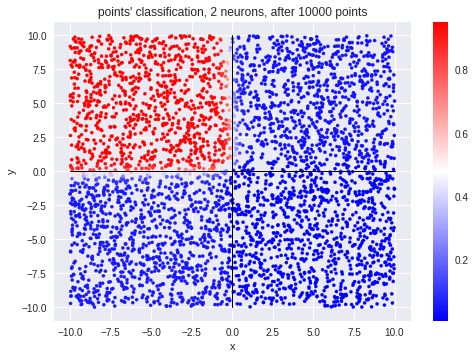

In [0]:
#@title <code>
import matplotlib.pyplot as plt
plt.scatter(x,y,c=label, s=10, cmap='bwr')
plt.title("points' classification, 2 neurons, after 10000 points")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
v=10
plt.plot([0, 0], [-v, v], 'k-', lw=1)
plt.plot([-v, v], [0, 0], 'k-', lw=1)
plt.show()


First test of points' classification looks also acceptable for this case. Probabilities for points close to coordinate axis are close to zero, but all situated farther have better match. 

### Effectiveness test

In [0]:
#@title <code>
output_notebook()

monte_carlo1 = 70
number_of_points1 = 5010
jump1 = 500
p1 = show_effectiveness2_point(monte_carlo1, number_of_points1, 0.1, jump1, "Uniform",3)

monte_carlo2 = 70
number_of_points2 = 5010
jump2 = 500
p2 = show_effectiveness2_point(monte_carlo2, number_of_points2, 0.1, jump2, "Normal",3)

monte_carlo3 = 70
number_of_points3 = 5010
jump3 = 500
p3 = show_effectiveness2_point(monte_carlo3, number_of_points3, 0.1, jump3, "Zeros",3)

show(gridplot([p1,p2,p3], ncols=2))

Loading BokehJS ...

As we can see the best choice of weights is from normal distribution, but the results in each plot are worse than for our simpler neural network. Now neural network needs more time to adjust weights.
Case with all-zeros-weights is on the level of 75% which is not acceptable (beacause to have 75% it is enought to always put 0 label).

In [0]:
#@title <code>
def show_effectiveness2_eta(monte_carlo, max_number_of_points, eta, distr_weights, net):
    x = eta
    y1 = [100*effectiveness2(monte_carlo, max_number_of_points, [2,1], i,distr_weights,net) for i in x]
    y2 = [100*effectiveness2(monte_carlo, max_number_of_points, [2,2], i,distr_weights,net) for i in x]
    y4 = [100*effectiveness2(monte_carlo, max_number_of_points, [4,2], i,distr_weights,net) for i in x]
    y10 = [100*effectiveness2(monte_carlo, max_number_of_points, [10,2], i,distr_weights,net) for i in x]
#     output_notebook()
    p = figure(plot_width=600, plot_height=400, title = "Effectiveness depending on eta (weights {})".format(str(distr_weights)))
#     p.grid.grid_line_alpha=0.3
    p.line(x,y1,color='#000000', legend='[2,1] neurons')
    p.line(x,y2,color='#0000FF', legend='[2,2] neurons')
    p.line(x,y4,color='#00FF00', legend='[4,2] neurons')
    p.line(x,y10,color='#FF0000', legend='[10,2] neurons')
    p.legend.location = "bottom_right"
    p.xaxis.axis_label = 'eta'
    p.yaxis.axis_label = 'Effectiveness in %'
#     show(p)
    return p

In [0]:
#@title <code>
output_notebook()

monte_carlo = 50
number_of_points = 5000
eta = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 0.75, 1]
p1 = show_effectiveness2_eta(monte_carlo, number_of_points, eta, "Uniform",3)
p2 = show_effectiveness2_eta(monte_carlo, number_of_points, eta, "Normal",3)
p3 = show_effectiveness2_eta(monte_carlo, number_of_points, eta, "Zeros",3)

show(gridplot([p1,p2,p3], ncols=2))

Loading BokehJS ...

Here the neural network was trained with 5000 points. We can deduce that here also eta greater than 0.1 is a good choice. Differently for all-zeros-case, this time values about 0.2 are the best.

In [0]:
#@title <code>
def show_effectiveness_both_point(monte_carlo, max_number_of_points, eta, jump, distr_weights):
    x = [i for i in np.arange(10,max_number_of_points,jump)]
    y4 = [100*effectiveness2(monte_carlo, i, 4, eta,distr_weights,2) for i in x]
    y10 = [100*effectiveness2(monte_carlo, i, 10, eta,distr_weights,2) for i in x]
    y4_2 = [100*effectiveness2(monte_carlo, i, [4,2], eta,distr_weights,3) for i in x]
    y10_2 = [100*effectiveness2(monte_carlo, i, [10,2], eta,distr_weights,3) for i in x]
    p = figure(plot_width=800, plot_height=600, title = "Effectiveness depending on number of training points (weights {})".format(str(distr_weights)))
#     p.grid.grid_line_alpha=0.3

    p.line(x,y4,color='#00FF00', legend='4 neurons')
    p.line(x,y10,color='#FF0000', legend='10 neurons')
    p.line(x,y4_2,color='#FFFF00', legend='l1=4, l2=2 neurons')
    p.line(x,y10_2,color='#00FFFF', legend='l1=10, l2=2 neurons')
    p.legend.location = "bottom_right"
    p.xaxis.axis_label = 'Number of training points'
    p.yaxis.axis_label = 'Effectiveness in %'
    show(p)
    return p

In [0]:
output_notebook()
show_effectiveness_both_point(50, 4000, 0.2, 300, "Normal")

Loading BokehJS ...

Figure(id='2675', ...)

Here we have trained our both networks with 4000 points, and we put eta equal to 0.2. We can see that one hidden layer is better for our problem. 

In [0]:
#Table
def create_table(monte_carlo, max_number_of_points, eta, jump, distr_weights):
    x = [i for i in np.arange(2000,max_number_of_points,jump)]
    y1 = [100*effectiveness2(monte_carlo, i, 1, eta,distr_weights,2) for i in x]
    y2 = [100*effectiveness2(monte_carlo, i, 2, eta,distr_weights,2) for i in x]
    y4 = [100*effectiveness2(monte_carlo, i, 4, eta,distr_weights,2) for i in x]
    y10 = [100*effectiveness2(monte_carlo, i, 10, eta,distr_weights,2) for i in x]
    
    y2_1 = [100*effectiveness2(monte_carlo, i, [2,1], eta,distr_weights,3) for i in x]
    y2_2 = [100*effectiveness2(monte_carlo, i, [2,2], eta,distr_weights,3) for i in x]
    y4_2 = [100*effectiveness2(monte_carlo, i, [4,2], eta,distr_weights,3) for i in x]
    y10_2 = [100*effectiveness2(monte_carlo, i, [10,2], eta,distr_weights,3) for i in x]
    
    

# Conclusions

We could see that even for simple problem we should check different combinations of parameters. The second thought is that sometimes less is more -- simpler neural network with one hidden layer has given better results after fitting with less number of training points. Of course for that simple problem we don't need neural networks, but we have learned how it works. Deep learning can be sometimes too much, so we need to think before we use some "black box".

# Example 1 - Point to point


### Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt

### Class Neutral Network

In [0]:
clean_data = cleaning(date)
# character_mentions(clean_data)class Neutral_Network:
    def __init__(self,in_put,out_put, w1 = np.random.rand(2,3), w2 =  np.random.rand(2,3)):
        self.input = in_put
        self.output = out_put
        self.weight1 = w1
        self.weight2 = w2
        ##
        self.fake_value = np.array([-1])
        self.fake_input_X1 = self.__create_fake_input_X1()
        self.layer1 = []
        self.fake_input_X2 = []
        self.layer2 = []
        ## 
        self.learning_rate = 0.1
        self.error_signal2 = []
        self.delta_signal2 = []
        self.d_weight2 = []
        ##
        self.error_signal1 = []
        self.delta_signal1 = []
        self.d_weight1 = []
        
#     def __if_weight_one(self):
#         if self.weight_1 == []:
#             return np.random.rand(2,3)
#         else:
#             return self.weight_1
    
#     def __if_weight_two(self):
#         if self.weight_2 == []:
#             return np.random.rand(2,3)
#         else:
#             return self.weight_2
        
    def __create_fake_input_X1(self):
        return np.vstack((self.input, self.fake_value))        
        
    def sigma(self,x):
        return 1.0/(1+ np.exp(-x))

    def sigma_derivative(self,x):
        return x * (1.0 - x)
    
    def feedforward(self):
        self.layer1 = self.sigma(np.dot(self.weight1, self.fake_input_X1))
#         print(self.layer1)
        self.fake_input_X2 = np.vstack((self.layer1,self.fake_value))
#         print(self.fake_input_X2)
        self.layer2 = self.sigma(np.dot(self.weight2, self.fake_input_X2))
    
    
    def backprop(self):
        # error for second layer
        self.error_signal2 = np.subtract(self.output , self.layer2)
        self.delta_signal2 = np.multiply(self.error_signal2, self.sigma_derivative(self.layer2))
        self.d_weight2 = np.add(self.weight2, np.multiply(self.learning_rate, np.dot(self.delta_signal2, self.fake_input_X2.T)))
        # error for first layer
        self.error_signal1 = np.dot(self.weight2.T, self.delta_signal2)
        self.error_signal1 = self.error_signal1[:-1]
        self.delta_signal1 = np.multiply(self.error_signal1, self.sigma_derivative(self.layer1))
        self.d_weight1 = np.add(self.weight1, np.multiply(self.learning_rate, np.dot(self.delta_signal1, self.fake_input_X1.T)))
        # change variables
        self.weight1 = self.d_weight1
        self.weight2 = self.d_weight2
        
    def solution(self, NumberOfRepetition):
        for i in range(NumberOfRepetition):
            self.feedforward()
            self.backprop()
        return self.layer2
        


### Data

In [0]:
W=np.array(([0.1, -0.2, 0.3],[-0.4, 0.5, -0.6]))
V=np.array(([0.15, -0.25, 0.35],[-0.45, 0.55, -0.65]))
in_put = np.array(([3],[-1]))
out_put = np.array(([1],[0]))

### Train your Neural_network on one point

In [0]:
nn = Neutral_Network(in_put, out_put,W,V)
nn.solution(100)
nn.feedforward_solution([1,4])


# Monte carlo - new

In this section we are checking the effectiveness depending on hyperparameters of our network using the Monte Carlo method. 

In [0]:
def effectiveness(monte_carlo, number_of_points, number_of_neurons, eta, distr_weights):
    mean_correct_guesses = []
    for mc in range(monte_carlo):
        correct_guesses = 0
        nnq = Neural_Network_on_quarter_2layers(number_of_points, number_of_neurons, eta, distr_weights)
        nnq.train_network()
        v=10
        for sample in range(1000):
            x = random.uniform(-v, v)
            y = random.uniform(-v, v)
            if x<0 and y>0:
                label = 1
            else:
                label = 0
            if np.around(nnq.solution([[x,y]])) == label:
                correct_guesses +=1
        mean_correct_guesses.append(correct_guesses)
    return np.mean(mean_correct_guesses)/1000

def show_effectiveness(monte_carlo, max_number_of_points, eta, jump, distr_weights):
    x = [i for i in np.arange(10,max_number_of_points,jump)]
    y1 = [100*effectiveness(monte_carlo, i, 1, eta,distr_weights) for i in x]
    y2 = [100*effectiveness(monte_carlo, i, 2, eta,distr_weights) for i in x]
    y4 = [100*effectiveness(monte_carlo, i, 4, eta,distr_weights) for i in x]
    y10 = [100*effectiveness(monte_carlo, i, 10, eta,distr_weights) for i in x]
    plt.plot(x, y1, label = '1 neuron')
    plt.plot(x, y2, label = '2 neurons')
    plt.plot(x, y4, label = '4 neurons')
    plt.plot(x, y10, label = '10 neurons')
    plt.legend()
    plt.title("Effectiveness depending on number of training points and neurons in hidden layer (weights U(0,1))")
    plt.xlabel("Number of training points")
    plt.ylabel("Effectiveness in %")
    plt.show()
    

In [0]:
monte_carlo = 70
number_of_points = 12010
jump = 500
show_effectiveness(monte_carlo, number_of_points, 0.1, jump, "Uniform")

In [0]:
monte_carlo = 100
number_of_points = 10000
jump = 500
show_effectiveness(monte_carlo, number_of_points, 0.1, jump)

As we expected the percentage of correct answers of the neural network is growing as the number of training points grows. Thus process of adjusting the weights works quite well. Nevertheless we can see that for one layer the effectiveness from one moment stays on one level earlier.

In [0]:
def show_effectiveness(monte_carlo, max_number_of_points, eta, distr_weights):
    x = eta
    y1 = [100*effectiveness(monte_carlo, max_number_of_points, 1, i, distr_weights) for i in x]
    y2 = [100*effectiveness(monte_carlo, max_number_of_points, 2, i, distr_weights) for i in x]
    y4 = [100*effectiveness(monte_carlo, max_number_of_points, 4, i, distr_weights) for i in x]
    plt.plot(x, y1, label = '1 neuron')
    plt.plot(x, y2, label = '2 neurons')
    plt.plot(x, y4, label = '4 neurons')
    plt.legend()
    plt.title("Effectiveness depending on number of neurons and eta (weights U(0,1), number of points = 12000)")
    plt.xlabel("eta")
    plt.ylabel("Effectiveness in %")
    plt.show()


In [0]:
eta = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25,0.5,0.75,1]
monte_carlo = 50
number_of_points = 12000
show_effectiveness(monte_carlo, number_of_points, eta, "Uniform")


In [0]:
monte_carlo = 50
number_of_points = 12000
jump = 1
max_number_of_neurons = 11
eta = 0.1
neurons = [i for i in np.arange(1, max_number_of_neurons, jump)]
effect = [100*effectiveness(monte_carlo, number_of_points, i, eta, "Uniform") for i in neurons]
plt.plot(neurons, effect)
plt.title("Effectiveness for different number of neurons in hidden layer (weights U(0,1), eta = 0.1, learning points = 12000)")
plt.xlabel("Number of neurons")
plt.ylabel("Effectiveness in %")
plt.show()


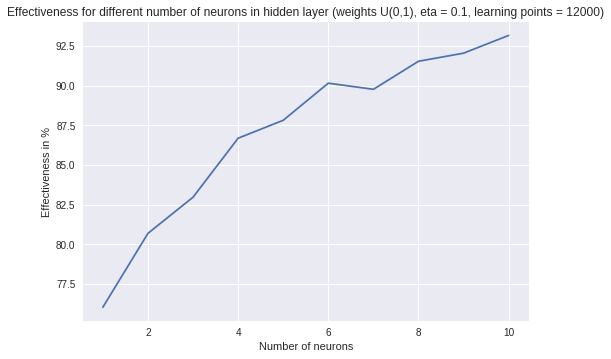

In [0]:
monte_carlo = 100
number_of_points = 100
jump = 1
max_number_of_neurons = 11
eta = 0.5
neurons = [i for i in np.arange(1, max_number_of_neurons, jump)]
effect = [100*effectiveness(monte_carlo, number_of_points, i, eta, "Uniform") for i in neurons]
plt.plot(neurons, effect)
plt.title("Effectiveness for different number of neurons in hidden layer (weights U(0,1), eta = 0.1, learning points = 12000)")
plt.xlabel("Number of neurons")
plt.ylabel("Effectiveness in %")
plt.show()